# Iris flower classifiction model

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report

## Data Overview

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Check for NULL values

In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Label encoding for Species column

In [5]:
lable_enc = LabelEncoder()
df.Species = lable_enc.fit_transform(df.Species)

## Correlation matrix

Text(0.5, 1.0, 'Heat Map of data')

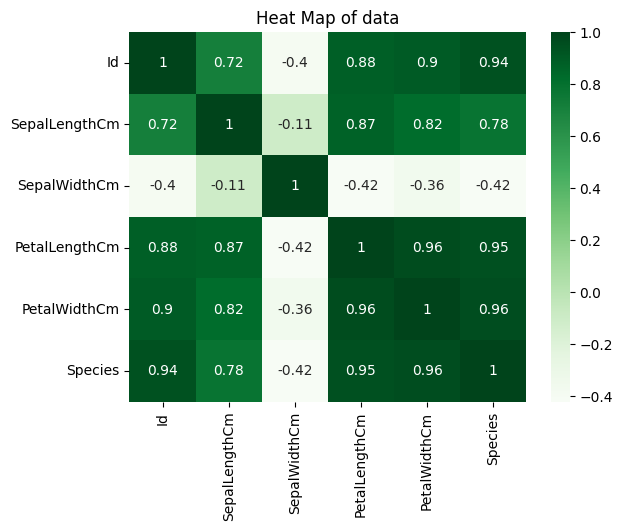

In [6]:
cm = df.corr()
sns.heatmap(cm,cmap='Greens',annot=True)
plt.title('Heat Map of data')

In [7]:
df.drop(['SepalWidthCm'], inplace=True, axis=1) #correlation with SepalWidthCm indicates this column can be dropped

In [8]:
X = df.drop(['Species'], axis=1).values
y = df.Species.values

## Split Data

In [9]:
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=.8, random_state=23)
X_train.shape, X_test.shape, y_train.shape,y_test.shape 

((120, 4), (30, 4), (120,), (30,))

## Model Training (KNN)

In [10]:
model = KNeighborsClassifier(n_neighbors=3) 

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
model_score = model.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'R2 Score: {r2}')
print(f'Model Score: {model_score}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

R2 Score: 1.0
Model Score: 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

